<a href="https://colab.research.google.com/github/SaiMasram750/Employee_Salary_Predection_Using_sklearn/blob/main/employee_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:


# Load the CSV into a DataFrame
data= pd.read_csv("/content/adult 3.csv")




In [ ]:
data.tail(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
data.shape

(9615, 15)

In [6]:
#null values
data.isna().sum() #mean mdeian mode arbitrary

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,1
gender,1


In [7]:
print(data.workclass.value_counts())

workclass
Private             6574
Self-emp-not-inc     782
Local-gov            609
?                    584
State-gov            429
Self-emp-inc         353
Federal-gov          279
Without-pay            4
Never-worked           1
Name: count, dtype: int64


In [8]:
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())

workclass
Private             6574
Self-emp-not-inc     782
Local-gov            609
Others               584
State-gov            429
Self-emp-inc         353
Federal-gov          279
Without-pay            4
Never-worked           1
Name: count, dtype: int64


/tmp/ipython-input-8-4184710730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [9]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       1222
Exec-managerial      1213
Craft-repair         1183
Adm-clerical         1079
Sales                1066
Other-service         960
Machine-op-inspct     621
?                     585
Transport-moving      429
Handlers-cleaners     414
Farming-fishing       310
Tech-support          279
Protective-serv       194
Priv-house-serv        57
Armed-Forces            3
Name: count, dtype: int64


In [10]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       1222
Exec-managerial      1213
Craft-repair         1183
Adm-clerical         1079
Sales                1066
Other-service         960
Machine-op-inspct     621
Others                585
Transport-moving      429
Handlers-cleaners     414
Farming-fishing       310
Tech-support          279
Protective-serv       194
Priv-house-serv        57
Armed-Forces            3
Name: count, dtype: int64


/tmp/ipython-input-10-1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [11]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             6574
Self-emp-not-inc     782
Local-gov            609
Others               584
State-gov            429
Self-emp-inc         353
Federal-gov          279
Name: count, dtype: int64


In [12]:
print(data.relationship.value_counts())

relationship
Husband           3797
Not-in-family     2521
Own-child         1510
Unmarried         1033
Wife               434
Other-relative     315
Name: count, dtype: int64


In [14]:
print(data.gender.value_counts())

gender
Male      6405
Female    3204
Name: count, dtype: int64


In [15]:
data.shape

(9610, 15)

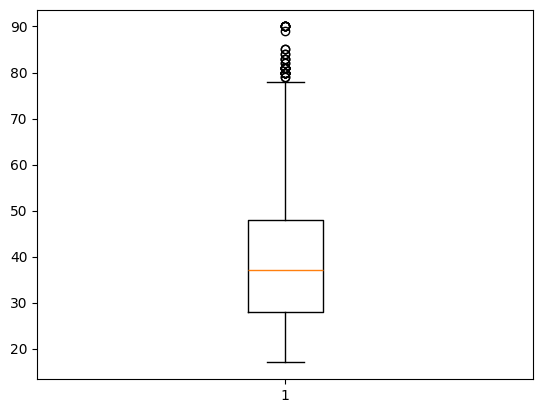

In [16]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [20]:
data=data[(data['age']<=75)&(data['age']>=17)]

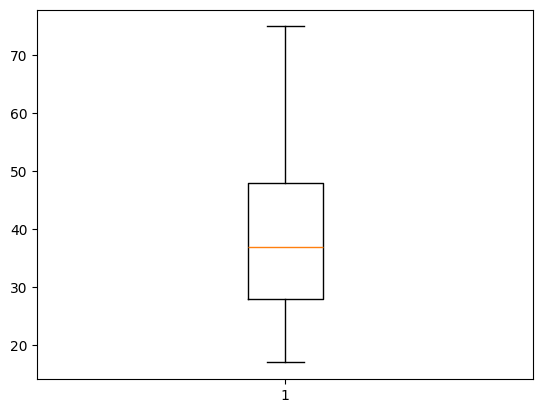

In [21]:
plt.boxplot(data['age'])
plt.show()

In [22]:
data.shape

(9531, 15)

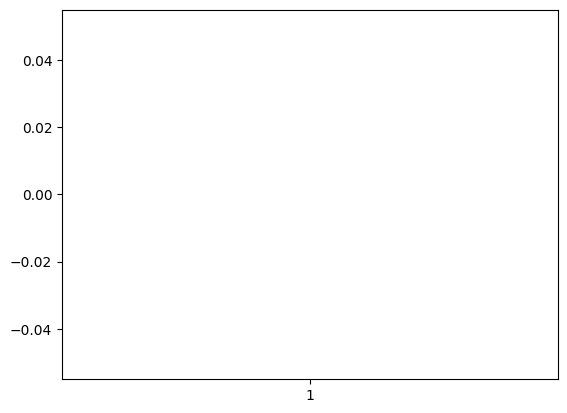

In [23]:
plt.boxplot(data['capital-gain'])
plt.show()

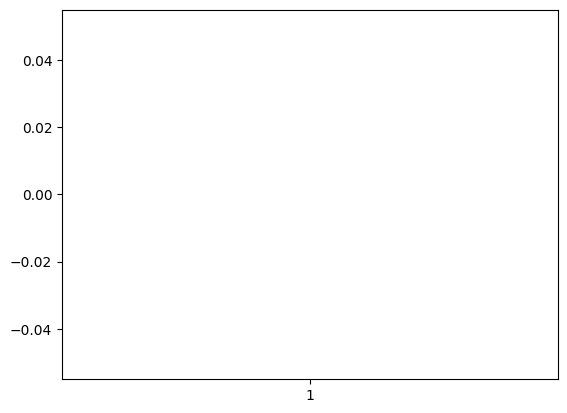

In [24]:
plt.boxplot(data['capital-gain'])
plt.show()

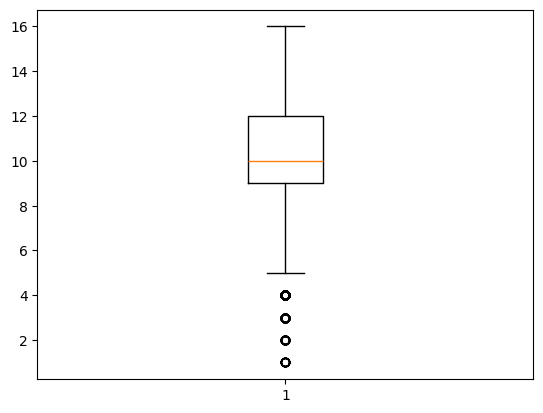

In [25]:
plt.boxplot(data['educational-num'])
plt.show()

In [26]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

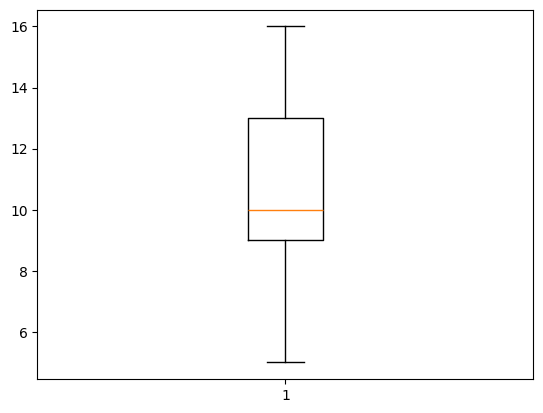

In [27]:
plt.boxplot(data['educational-num'])
plt.show()

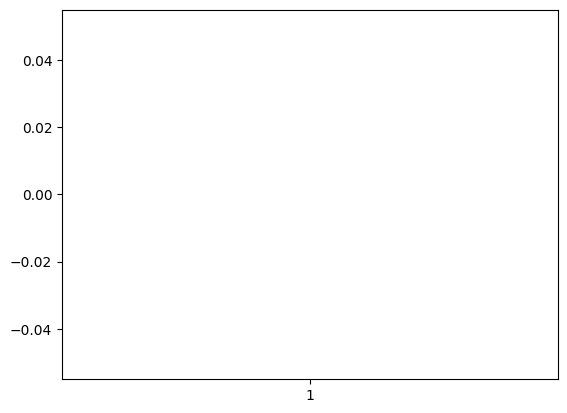

In [28]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [29]:
data.shape

(9200, 15)

In [30]:
data=data.drop(columns=['education']) #redundant features removal

In [31]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9610,25,Private,318644,13,Never-married,Exec-managerial,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
9611,20,Private,227594,9,Never-married,Other-service,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
9612,59,Private,165695,12,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,32.0,United-States,>50K
9613,55,Private,127728,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,50.0,United-States,>50K


In [32]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

In [33]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0.0,0.0,40.0,38,<=50K
1,38,3,89814,9,2,4,0,4,1,0.0,0.0,50.0,38,<=50K
2,28,1,336951,12,2,11,0,4,1,0.0,0.0,40.0,38,>50K
3,44,3,160323,10,2,6,0,2,1,7688.0,0.0,40.0,38,>50K
4,18,2,103497,10,4,8,3,4,0,0.0,0.0,30.0,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9610,25,3,318644,13,4,3,3,4,1,0.0,0.0,40.0,38,<=50K
9611,20,3,227594,9,4,7,3,4,0,0.0,0.0,40.0,38,<=50K
9612,59,3,165695,12,2,14,0,4,1,0.0,0.0,32.0,38,>50K
9613,55,3,127728,9,2,2,0,4,1,0.0,0.0,50.0,38,>50K


In [34]:
x=data.drop(columns=['income'])
y=data['income']
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0.0,0.0,40.0,38
1,38,3,89814,9,2,4,0,4,1,0.0,0.0,50.0,38
2,28,1,336951,12,2,11,0,4,1,0.0,0.0,40.0,38
3,44,3,160323,10,2,6,0,2,1,7688.0,0.0,40.0,38
4,18,2,103497,10,4,8,3,4,0,0.0,0.0,30.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9610,25,3,318644,13,4,3,3,4,1,0.0,0.0,40.0,38
9611,20,3,227594,9,4,7,3,4,0,0.0,0.0,40.0,38
9612,59,3,165695,12,2,14,0,4,1,0.0,0.0,32.0,38
9613,55,3,127728,9,2,2,0,4,1,0.0,0.0,50.0,38


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Drop rows with NaN in the target variable
data_cleaned = data.dropna(subset=['income'])
x = data_cleaned.drop(columns=['income'])
y = data_cleaned['income']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')), # Add imputer to handle NaN values
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.8174
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      1397
        >50K       0.69      0.44      0.54       443

    accuracy                           0.82      1840
   macro avg       0.76      0.69      0.71      1840
weighted avg       0.80      0.82      0.80      1840

RandomForest Accuracy: 0.8554
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      1397
        >50K       0.74      0.62      0.67       443

    accuracy                           0.86      1840
   macro avg       0.81      0.78      0.79      1840
weighted avg       0.85      0.86      0.85      1840

KNN Accuracy: 0.8239
              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.89      1397
        >50K       0.64      0.61      0.62       443

    accuracy                           0.82      1840
   macro avg       0.76      0.75      0.

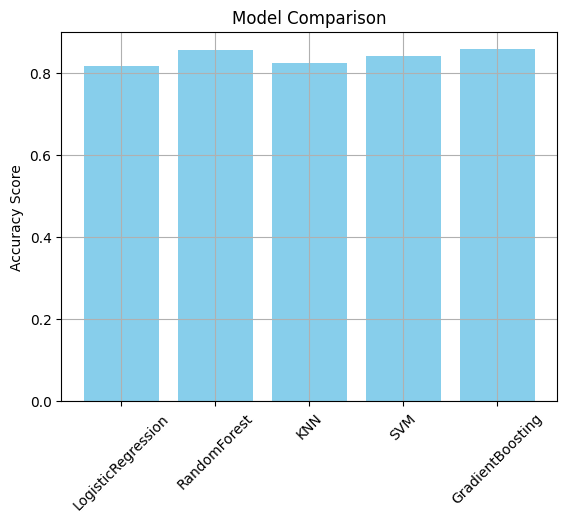

In [40]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import joblib
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Feature + target setup
x = data.drop(columns=["income"])
y = data["income"]

# Drop rows with NaN in the target variable
data_cleaned = data.dropna(subset=['income'])
x_cleaned = data_cleaned.drop(columns=['income'])
y_cleaned = data_cleaned['income']


X_train, X_test, y_train, y_test = train_test_split(x_cleaned, y_cleaned, test_size=0.2, random_state=42)

# 🔧 Define preprocessing
categorical_features = [
    'workclass', 'marital-status', 'occupation', 'relationship',
    'race', 'gender', 'native-country'
]
numeric_features = [col for col in x_cleaned.columns if col not in categorical_features]

# Create a preprocessor with imputation, one-hot encoding, and scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Impute missing values in numeric features
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])


# 🔍 Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# 🔄 Train and evaluate with pipeline
for name, clf in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# 🏆 Save the best pipeline
best_model_name = max(results, key=results.get)
best_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", models[best_model_name])
])
best_pipeline.fit(x_cleaned, y_cleaned) # Fit on cleaned data
joblib.dump(best_pipeline, "best_model.pkl")
print(f"✅ Best model: {best_model_name} saved as best_model.pkl")

LogisticRegression: 0.8495
RandomForest: 0.8505
KNN: 0.8234
SVM: 0.8522
GradientBoosting: 0.8630
✅ Best model: GradientBoosting saved as best_model.pkl


In [43]:
%%writefile requirements.txt
streamlit
pandas
scikit-learn
joblib


Overwriting requirements.txt


In [44]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="centered")
st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (must match training features)
st.sidebar.header("Input Employee Details")

age = st.sidebar.slider("Age", 17, 75, 30)
workclass = st.sidebar.selectbox("Workclass", [
    "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov", "State-gov", "Others"
])
fnlwgt = st.sidebar.number_input("Fnlwgt", 10000, 1000000, 50000)
marital_status = st.sidebar.selectbox("Marital Status", [
    "Married-civ-spouse", "Divorced", "Never-married", "Separated", "Widowed", "Married-spouse-absent"
])
occupation = st.sidebar.selectbox("Occupation", [
    "Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty",
    "Handlers-cleaners", "Machine-op-inspct", "Adm-clerical", "Farming-fishing", "Transport-moving",
    "Priv-house-serv", "Protective-serv", "Armed-Forces", "Others"
])
relationship = st.sidebar.selectbox("Relationship", [
    "Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"
])
race = st.sidebar.selectbox("Race", [
    "White", "Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"
])
gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
capital_gain = st.sidebar.number_input("Capital Gain", 0, 99999, 0)
capital_loss = st.sidebar.number_input("Capital Loss", 0, 99999, 0)
educational_num = st.sidebar.slider("Educational Num", 5, 16, 10)
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
native_country = st.sidebar.selectbox("Native Country", [
    "United-States", "Mexico", "Philippines", "Germany", "Canada", "India", "England", "Others"
])

input_df = pd.DataFrame({
    'age': [age],
    'workclass': [workclass],
    'fnlwgt': [fnlwgt],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender': [gender],
    'capital-gain': [capital_gain],
    'capital-loss': [capital_loss],
    'educational-num': [educational_num],
    'hours-per-week': [hours_per_week],
    'native-country': [native_country]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    # Ensure columns match
    required_cols = [
        'age', 'workclass', 'fnlwgt', 'marital-status', 'occupation', 'relationship',
        'race', 'gender', 'capital-gain', 'capital-loss', 'educational-num',
        'hours-per-week', 'native-country'
    ]
    missing_cols = [col for col in required_cols if col not in batch_data.columns]
    if missing_cols:
        st.error(f"Missing columns in uploaded file: {missing_cols}")
    else:
        batch_preds = model.predict(batch_data[required_cols])
        batch_data['PredictedClass'] = batch_preds
        st.write("✅ Predictions:")
        st.write(batch_data.head())
        csv = batch_data.to_csv(index=False).encode('utf-8')
        st.download_button("Download Predictions CSV", csv, file_name="predictions.csv", mime="text/csv")


Overwriting app.py


In [45]:
!pip install streamlit pygrok


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00
  Created wheel for pygrok: filename=pygrok-1.0.0-py3-none-any.whl size=21725 sha256=505cd9e3b73903b266fd08c2a2d5e31c82b1ff824506d72c623517a95370b573
  Stored in directory: /root/.cache/pip/wheels/68/0a/e9/5af5254e12947ad9a043b254a9c50ab3a16bface70da9cd455
Successfully built pygrok


In [46]:
!pip install streamlit pyngrok

In [47]:
!ngrok authtoken 30C0Ar85Hw8YDYh77Mq7hVepXcK_5acs3dqUF8bsRXUoHYAZn

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [48]:
import os
import threading
def run_streamlit():
  os.system("streamlit run app.py --server.port 8501 ")
threading.Thread(target=run_streamlit).start()

In [49]:
from pyngrok import ngrok
import time
time.sleep(5)
public_url=ngrok.connect(8501)
print("sttreamlit app is live here ",public_url)

sttreamlit app is live here  NgrokTunnel: "https://d43d20330e74.ngrok-free.app" -> "http://localhost:8501"
